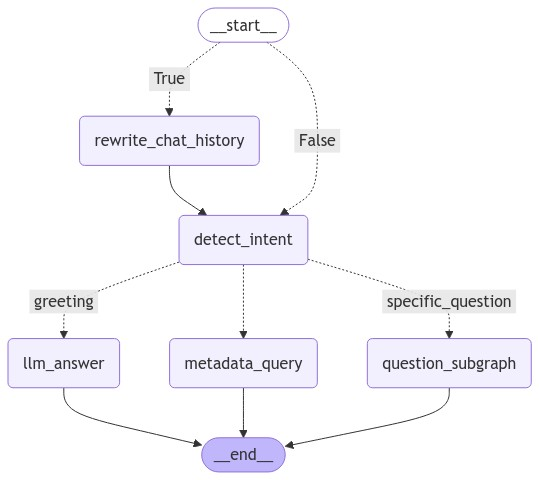

Question: 
  ماهي إجراءات تعليق تداول الأوراق المالية المدرجة بناءً على طلب المصدر؟

Answer: 



{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967746, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"role": "assistant", "content": ""}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967755, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "<"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967755, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "answer"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967755, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": ">\n"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967755, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u0644\u0627"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967755, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": " \u062a"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967755, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u0648\u062c\u062f"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967755, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": " \u0645\u0639\u0644\u0648\u0645\u0627\u062a"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967755, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": " \u0645\u062a"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967755, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u0648"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967755, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u0641\u0631"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967755, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u0629"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967755, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": " \u0641\u064a"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967755, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": " \u0627\u0644\u0645\u0635"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967755, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u0627\u062f\u0631"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967755, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": " \u0627\u0644\u0645\u0642"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967755, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u062f\u0645\u0629"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967755, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": " \u062d\u0648\u0644"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967755, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": " \u0625"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967755, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u062c\u0631"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u0627\u0621\u0627\u062a"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": " \u062a\u0639"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u0644\u064a"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u0642"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": " \u062a"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u062f\u0627"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u0648\u0644"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": " \u0627\u0644\u0623"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u0648\u0631"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u0627\u0642"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": " \u0627\u0644\u0645"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u0627\u0644\u064a\u0629"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": " \u0627\u0644\u0645\u062f\u0631"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u062c\u0629"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": " \u0628\u0646"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u0627\u0621"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u064b"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": " \u0639\u0644\u0649"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": " \u0637\u0644\u0628"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": " \u0627\u0644\u0645\u0635"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u062f\u0631"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": ".\n\n\n"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "References"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": ":\n"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u0644\u0627"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": " \u062a"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967756, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u0648\u062c\u062f"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967757, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": " \u0645\u0631\u0627\u062c\u0639"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967757, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": " \u0645\u062a"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967757, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u0648"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967757, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u0641\u0631"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967757, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u0629"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967757, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": " \u0641\u064a"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967757, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": " \u0647\u0630\u0627"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967757, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": " \u0627\u0644\u0633\u064a"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967757, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "\u0627\u0642"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967757, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": ".\n\n\n"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967757, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "</"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967757, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": "answer"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967757, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": ">"}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967757, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {"content": ""}, "logprobs": null, "finish_reason": null}]}

{"id": "chatcmpl-33e11f8d-bdef-46d7-9b19-0f5edbc35c41", "object": "chat.completion.chunk", "created": 1729967760, "model": "demo", "system_fingerprint": "fp_33e11f8d", "choices": [{"index": 0, "delta": {}, "logprobs": null, "finish_reason": "stop"}]}

In [2]:
# Load packages from the src directory
import sys
from IPython.display import Markdown, display, Image
sys.path.append('../src')

from langchain_core.messages import HumanMessage
from vectrix_graphs import local_slm_demo
from vectrix_graphs.graphs.utils.stream_processor import StreamProcessor
from vectrix_graphs.logger import setup_logger

# Display the graph
display(Image(local_slm_demo.get_graph().draw_mermaid_png()))

stream = StreamProcessor(graph=local_slm_demo)

# Set the input message
input = [HumanMessage(content=" ماهي إجراءات تعليق تداول الأوراق المالية المدرجة بناءً على طلب المصدر؟")]

print(f"Question: \n {input[0].content}\n")
print("Answer: \n")
# Run the stream and print the chunks
async for chunk in stream.process_stream(messages=input):
    display(Markdown(chunk))